In [1]:
from IPython.core.display import HTML  #For a more pleasing rendering...
HTML(open("styles/custom.css").read()) #When run in your local notebook.

## 2.0.1 OpenAI Gym Introduction

<font> The OpenAI Gym [Documentation](https://gym.openai.com/docs) is a good point to start. We will recapitulate the most part here and take a closer look in the environments we will use later on. </font>

At first we generate an environment, for example Pong:

In [2]:
import gym
env = gym.make('Pong-v0') # create the environment in this case 'Pong-V0'

[2017-09-22 10:32:23,011] Making new env: Pong-v0


Then we can generate some random actions: 

Sadly because we are in a IPython notebook it is not possible to display the games in the cell directly. We will render about 500 frames of the environment. 

In [3]:
# Local Notebook
env.reset() # Always reset the environment in the beginning
for _ in range(500):
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.render(close=True)

Every game has different action spaces, so all the possible actions you could take. 

In [4]:
 print env.action_space 

Discrete(6)


After you take a step with your chosen action you get an observation, reward, done and info back. That is exactly what we need to work with the environment. 

In [5]:
env.reset()
action = env.action_space.sample()
observation, reward, done, info = env.step(action)
print "Observation space: ", env.observation_space
print "Observation: ", observation
print "Reward: ", reward
print "Done: ", done
print "Info: ", info

Observation space:  Box(210, 160, 3)
Observation:  [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..., 
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ..., 
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ..., 
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ..., 
 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ..., 
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ..., 
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ..., 
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
Reward:  0.0
Done:  False
Info:  {'ale.lives': 0}


<font>**observation (object)**: an environment-specific object representing your observation of the environment. For example, pixel data from a camera, joint angles and joint velocities of a robot, or the board state in a board game.
$$ $$
**reward (float)**: amount of reward achieved by the previous action. The scale varies between environments, but the goal is always to increase your total reward.
$$ $$
**done (boolean)**: whether it's time to reset the environment again. Most (but not all) tasks are divided up into well-defined episodes, and done being True indicates the episode has terminated. (For example, perhaps the pole tipped too far, or you lost your last life.)
$$ $$
**info (dict)**: diagnostic information useful for debugging. It can sometimes be useful for learning (for example, it might contain the raw probabilities behind the environment's last state change). However, official evaluations of your agent are not allowed to use this for learning.
$$ $$
quoted from the OpenAi Gym [documentation](https://gym.openai.com/docs). </font>


<img src="./images/Ablauf_reinforcement_learning.PNG" width=400/>

### Play on your own

If you are running the notebook locally and want to try playing the game on your own, you just have to install the latest version of [pygame](http://www.pygame.org/wiki/GettingStarted#Pygame%20Installation). 

In [6]:
import gym
import gym.utils.play as pl

env = gym.make('Pong-v0')
env.reset();

[2017-09-22 10:32:56,470] Making new env: Pong-v0


In [7]:
pl.play(env)

The relevant keys are different for every game, sadly there is no way to translate them automatically. 

### Environments 

We want to show you briefly the environments we will be using. 

#### Frozen Lake

<font> The objective of this game is to cross a frozen lake from $(S)$ to $(G)$. However, not the whole lake is frozen $(F)$ yet, there are some holes $(H)$. To make this game harder, a wind blows the player in any direction from time to time. For this environment, the Q-Learning is the better strategy as it takes the wind into account. The agent now has to learn to find a way from $(S)$ to $(G)$. It can chose between the **four actions** up, down, left, and right. The reward is only given at the very end, when the agents reaches $(G)$. The observation is the current field you are on. </font>

<img src="./images/FrozenLake.PNG" width=400/>

#### Cart Pole

<font> A  pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center. Your observation consists of the carts coordinate and speed and also the poles angle and speed. </font>

<img src="./images/cartpole.gif" width=400/>

#### Atari environments 

<font>There are six different actions in Atari games:
$$ $$
0 - NOOP   
1 - FIRE   
2 - RIGHT   
3 - LEFT   
4 - RIGHTFIRE   
5 - LEFTFIRE   
$$ $$
However, for some of our enviroments, i.e. Pong, we only need the actions RIGHT and LEFT, which is encoded as 2 and 3 respectively. The observation is always a 210x160x3 Array: the RBG image of the screen. </font>

#### Pong
<font> Maximize your score in the Atari 2600 game Pong. In this environment each action is repeatedly performed for a duration of $k$ frames, where $k$ is uniformly sampled from ${2,3,4}$. That means we will have random frame skips, will make the whole game much more difficult. 
$$ $$
This game simulates table tennis. The player, controls a paddle to hit the ball back and forth. If one misses the ball gains the other player a point.
As you can see, the reward is only given if the other player wins the game, not if you only hit the ball correctly. </font>

<img src="./images/pong.gif" width=200/>

### Preprocessing

<font>In order to optimize your code it is worth it to preprocess your observations befor feeding it in the neural network. We will shortly describe our preprocessing for the atari games. </font>

<font> For Pong for example we only want to see the important data; so we **crop** the sides and **downsample** the picture with an factor of 2. Then we can set the **color** to 0 for unimportant things like the background and 1 for the paddles and the ball. 
$$ $$
Our output will then be an 1D vector in order to be supported by our network.</font>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gym

env = gym.make('Pong-v0')

[2017-09-22 10:34:34,294] Making new env: Pong-v0


In [2]:
def prepro(I):
    """ prepro 210x160x3 uint8 frame into 6400 (80x80) 1D float vector """
    I = I[35:195] # Crop
    I = I[::2,::2,0] # Downsample by factor of 2
    I[I == 144] = 0  # Erase background (background type 1)
    I[I == 109] = 0  # Erase background (background type 2)
    I[I != 0] = 1    # Everything else (paddles, ball) just set to 1
    return I #.astype(np.float).ravel()
            # Normally return this as a 1D vector

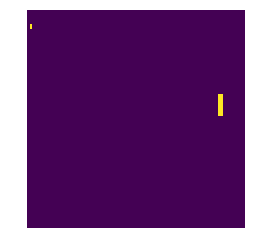

In [3]:
plt.imshow(prepro(env.reset()))
plt.axis('off')
plt.show()

Finally we dont just feed the single frame into the model, we also substract the previous frame(s) in order to get a sense of motion. 

<font> On our remote server it is not possible to render the images directly inline, we still can obtain the RGB-information of the image if they are our observation. Sadly there are few of them, but you can have a look at the atari games for example. </font>

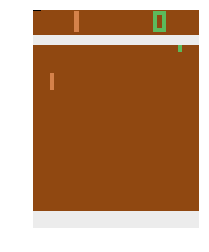

In [5]:
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('Pong-v0')
env.reset()
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
plt.axis('off')
for _ in range(100):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)